In [1]:
from astropy.io import fits
import numpy as np
import healpy as hp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
quasar_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-NGC-vDR16.fits')
quasar_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-SGC-vDR16.fits')
quasar_all = np.hstack((quasar_n, quasar_s))

In [3]:
random_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-NGC-vDR16.fits')
random_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-SGC-vDR16.fits')
random_all = np.hstack((random_n, random_s))

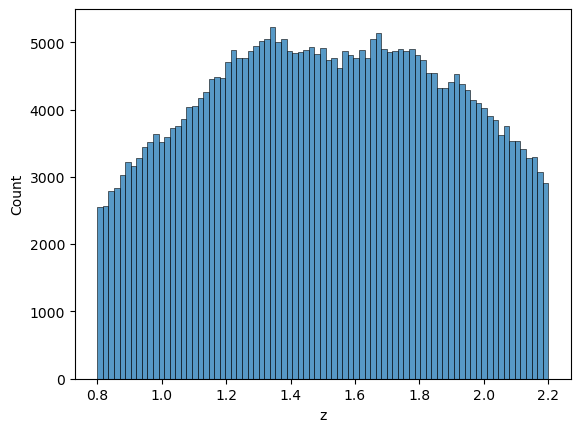

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(quasar_all['Z'], ax=ax)
ax.set_xlabel('z')
plt.savefig('./fig/quasar_lss_z')

In [19]:
lowz = 1.5
highz = 2
prefix = '_h'

In [20]:
quasar = quasar_all[np.logical_and(quasar_all['Z']<highz, quasar_all['Z']>lowz)]
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*(quasar['WEIGHT_NOZ'] + quasar['WEIGHT_CP'] - 1)
np.save(f'../catalogue/quasar_lss{prefix}', quasar_cata)
random = random_all[np.logical_and(random_all['Z']<highz, random_all['Z']>lowz)]
random_cata = np.zeros(len(random), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
random_cata['ra'] = random['RA']
random_cata['dec'] = random['DEC']
random_cata['z'] = random['Z']
random_cata['w'] = 1
np.save(f'../catalogue/random_quasar_lss{prefix}', np.random.choice(random_cata, len(quasar_cata)*20, replace=False))

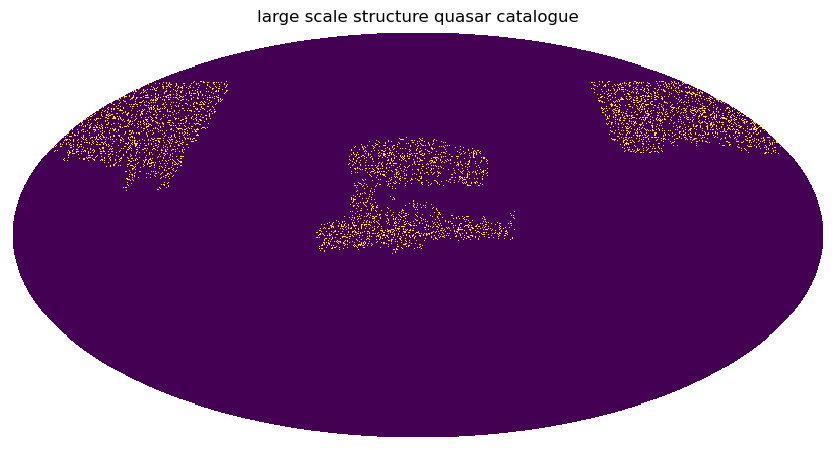

In [23]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.deg2rad(90-quasar_cata['dec']), np.deg2rad(quasar_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar catalogue', cbar=False)
plt.savefig('./fig/lss')

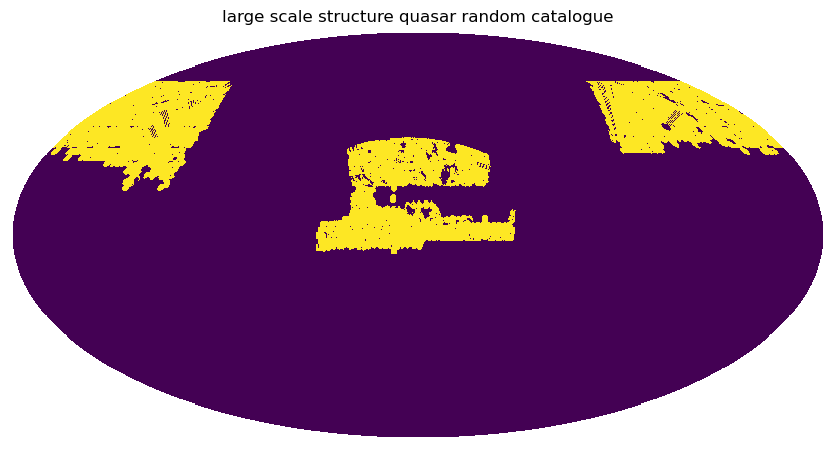

In [25]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.deg2rad(90-random_cata['dec']), np.deg2rad(random_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar random catalogue', cbar=False)

Try matching

quasar lss catalogue has QSO ID, which can be matched to quasar lss full data file.
We can also consider matching th position to SDSS 16Q quasar, which has absolute magenitude.

In [3]:
quasar_all['QSO_ID']

array([583496, 367863, 406415, ...,  80392, 138044, 136739])

In [4]:
quasar_all_data = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_full_ALLdata-vDR16.fits')
quasar_SDSS = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')
quasar_SDSS_super = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_Superset_v3.fits')

In [5]:
from sklearn.neighbors import KDTree

In [6]:
tree = KDTree(np.c_[quasar_SDSS['RA'], quasar_SDSS['DEC']], metric='euclidean')

In [7]:
que = tree.query(np.c_[quasar_all['RA'], quasar_all['DEC']])

In [25]:
valid = que[0] < 5/3600
index = que[1]
M_I = quasar_SDSS['M_I'][index]
M_I[~valid] = np.nan

In [29]:
mid = np.percentile(M_I[valid], 50)
left_index = M_I <= mid
right_index = M_I >= mid

<Axes: ylabel='Count'>

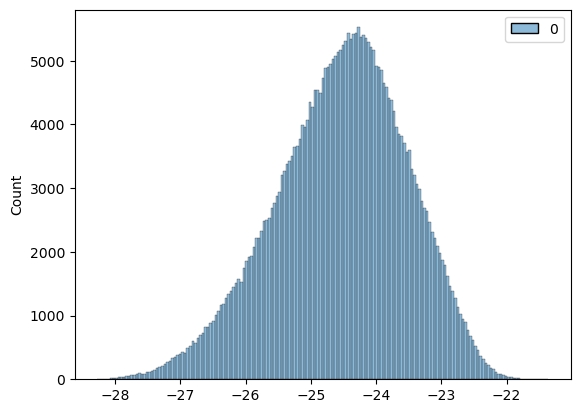

In [16]:
sns.histplot(M_I.astype(float))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(quasar_SDSS['Z'].astype(float), ax=ax)

In [ ]:
quasar = quasar_SDSS[np.logical_and(quasar_SDSS['Z']<3, quasar_SDSS['Z']>2)]
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
quasar_cata['w'] = 1
np.save('../catalogue/quasar_z>2', quasar_cata)